# Bloque 1 - clasificando datos

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

**1** - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con ``pandas``.

**2** - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro ``stratify`` a partir de la variable objetivo para mantener la proporción de los datos.

**3** - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos [``DecisionTreeClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [``RandomForestClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro ``max_depth`` del algoritmo ``DecisionTreeClassifier`` y el valor 2 para el ``max_depth`` del algoritmo ``RandomForestClassifier``, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

**4** - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método ``predict`` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



## Tarea 1

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [6]:
X = df.drop(columns='diabetes',axis=1)
y = df.diabetes

In [7]:
X.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: diabetes, dtype: int64

## Tarea 2

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# esto es para saber cuan desproporcionado estan los numeros
y.value_counts().sort_index()

diabetes
0    264
1    130
Name: count, dtype: int64

In [11]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

## Tarea 3

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
modeloTree = DecisionTreeClassifier(max_depth=3)
modeloRandomForest = RandomForestClassifier(max_depth=2)

modeloTree.fit(X,y)
modeloRandomForest.fit(X,y)

print('Modelo Tree')
print(f'La exactitud del modelo en entrenamiento es: {modeloTree.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloTree.score(X_val,y_val)}\n\n')
print('Modelo Random Forest')
print(f'La exactitud del modelo en entrenamiento es: {modeloRandomForest.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloRandomForest.score(X_val,y_val)}')

Modelo Tree
La exactitud del modelo en entrenamiento es: 0.725
La exactitud del modelo en validacion es: 0.8191489361702128


Modelo Random Forest
La exactitud del modelo en entrenamiento es: 0.7142857142857143
La exactitud del modelo en validacion es: 0.7659574468085106


## Tarea 4

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_previstoTree = modeloTree.predict(X_val)
y_previstoRandomForest = modeloRandomForest.predict(X_val)

matriz_confusionTree = confusion_matrix(y_val,y_previstoTree)
matriz_confusionRandomForest = confusion_matrix(y_val,y_previstoRandomForest)

print('Tree')
print(f'{matriz_confusionTree}\n')
print(f'Random Forest')
print(matriz_confusionRandomForest)

Tree
[[60  3]
 [14 17]]

Random Forest
[[61  2]
 [20 11]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

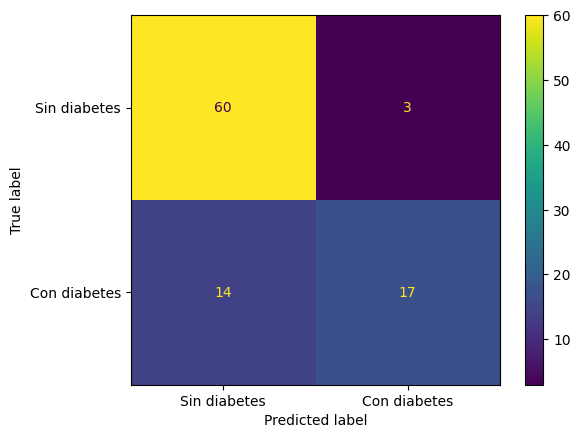

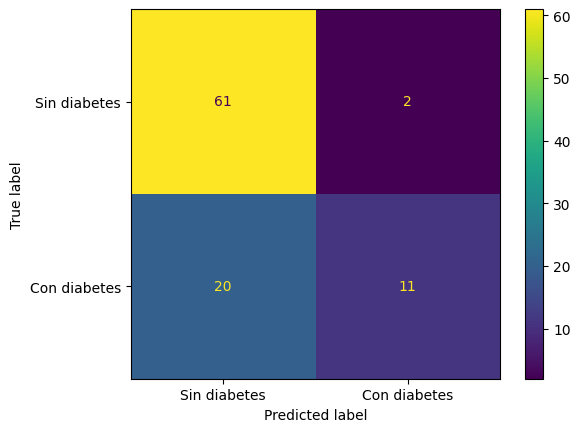

In [17]:
visualizacionTree = ConfusionMatrixDisplay(confusion_matrix=matriz_confusionTree,display_labels=['Sin diabetes', 'Con diabetes'])
visualizacionTree.plot();
visualizacionRandomForest = ConfusionMatrixDisplay(confusion_matrix=matriz_confusionRandomForest,display_labels=['Sin diabetes', 'Con diabetes'])
visualizacionRandomForest.plot();

# Bloque 2 - Métricas de evaluación

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero usando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

Estos desafíos dependen del modelo generado en los desafíos de la clase 1.

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método [RocCurveDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método [PrecisionRecallDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions).

4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Como consejo, revisa la documentación de ``Scikit-learn`` desde este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.

## Tarea 1

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previstoTree)}')
print(f'La accuray del modelo es: {accuracy_score(y_val,y_previstoTree)}')
print(f'La recall del modelo es: {recall_score(y_val,y_previstoTree)}')
print(f'La F1 del modelo es: {f1_score(y_val,y_previstoTree)}')

La precisión del modelo es: 0.85
La accuray del modelo es: 0.8191489361702128
La recall del modelo es: 0.5483870967741935
La F1 del modelo es: 0.6666666666666666


In [20]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previstoRandomForest)}')
print(f'La accuray del modelo es: {accuracy_score(y_val,y_previstoRandomForest)}')
print(f'La recall del modelo es: {recall_score(y_val,y_previstoRandomForest)}')
print(f'La F1 del modelo es: {f1_score(y_val,y_previstoRandomForest)}')

La precisión del modelo es: 0.8461538461538461
La accuray del modelo es: 0.7659574468085106
La recall del modelo es: 0.3548387096774194
La F1 del modelo es: 0.5


## Tarea 2

In [21]:
from sklearn.metrics import RocCurveDisplay

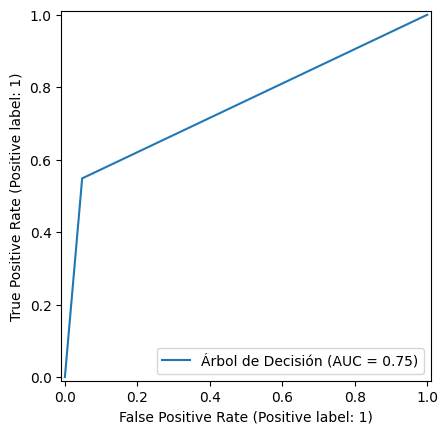

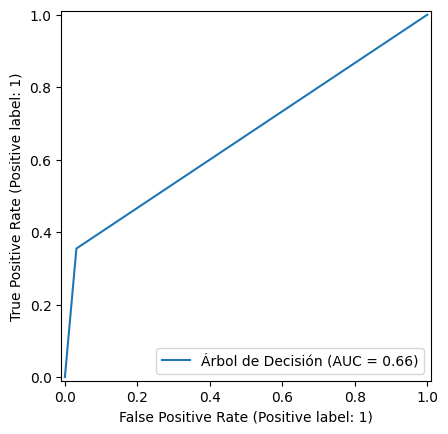

In [22]:
RocCurveDisplay.from_predictions(y_val,y_previstoTree,name='Árbol de Decisión')
RocCurveDisplay.from_predictions(y_val,y_previstoRandomForest,name='Árbol de Decisión')

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
print(f'El area bajo la curva ROC del modelo de TREE es: {roc_auc_score(y_val,y_previstoTree)}')
print(f'El area bajo la curva ROC del modelo de RANDOM_FOREST es: {roc_auc_score(y_val,y_previstoRandomForest)}')

El area bajo la curva ROC del modelo de TREE es: 0.7503840245775729
El area bajo la curva ROC del modelo de RANDOM_FOREST es: 0.6615463389656939


## Tarea 3

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

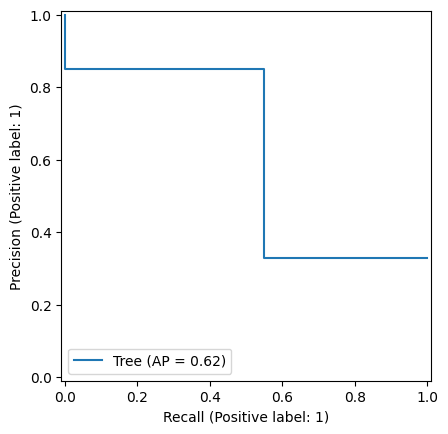

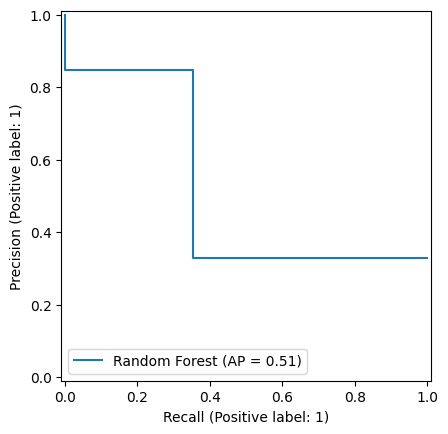

In [26]:
PrecisionRecallDisplay.from_predictions(y_val,y_previstoTree,name='Tree')
PrecisionRecallDisplay.from_predictions(y_val,y_previstoRandomForest,name='Random Forest')

In [27]:
from sklearn.metrics import average_precision_score

In [28]:
print(f'El score promedio de precisión vs recall de TREE es: {average_precision_score(y_val,y_previstoTree)}')
print(f'El score promedio de precisión vs recall de RANDOM FOREST es: {average_precision_score(y_val,y_previstoRandomForest)}')

El score promedio de precisión vs recall de TREE es: 0.6150652024708304
El score promedio de precisión vs recall de RANDOM FOREST es: 0.5130140964046248


## Tarea 4

In [29]:
from sklearn.metrics import classification_report

In [30]:
print('Tree')
print(classification_report(y_val,y_previstoTree))
print('\nRandom Forest')
print(classification_report(y_val,y_previstoRandomForest))

Tree
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        63
           1       0.85      0.55      0.67        31

    accuracy                           0.82        94
   macro avg       0.83      0.75      0.77        94
weighted avg       0.82      0.82      0.81        94


Random Forest
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        63
           1       0.85      0.35      0.50        31

    accuracy                           0.77        94
   macro avg       0.80      0.66      0.67        94
weighted avg       0.78      0.77      0.73        94



# Bloque 3 - Validación cruzada

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

``Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]``

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método [``KFold``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes, con el uso del parámetro ``n_splits`` y mezclando los datos antes de la separación con el parámetro ``shuffle``. Usa el método [``cross_val_score``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que no retorna el tiempo de ejecución, solo las métricas.

3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (``cross_val_score``) con el método [``StratifiedKFold``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando el parámetro ``n_splits`` y mezclando los datos antes de la separación con el parámetro ``shuffle`` y evaluando la métrica F1-Score usando el parámetro ``scoring``.

4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El ``LeaveOneOut`` es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (``cross_val_score``) con el método [``LeaveOneOut``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método ``mean()``, sin utilizar el intervalo de confianza.

## Tarea 1

In [31]:
df['diabetes'].value_counts()

diabetes
0    264
1    130
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_validate, LeaveOneOut

In [33]:
listaMetricas = ['accuracy','recall','precision','f1']

In [34]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring=listaMetricas)
cv_resultados

{'fit_time': array([0.00750446, 0.00499058, 0.00998497, 0.00998354, 0.00499177]),
 'score_time': array([0.02743745, 0.03244925, 0.02495956, 0.01997972, 0.01746154]),
 'test_accuracy': array([0.58666667, 0.68      , 0.66666667, 0.65333333, 0.7027027 ]),
 'test_recall': array([0.4       , 0.48      , 0.4       , 0.20833333, 0.58333333]),
 'test_precision': array([0.38461538, 0.52173913, 0.5       , 0.41666667, 0.53846154]),
 'test_f1': array([0.39215686, 0.5       , 0.44444444, 0.27777778, 0.56      ])}

In [50]:
def intervalo_confianza(resultados,metricas,nombreAlgoritmo: str):
    for x in metricas:
        promedio = resultados[f'test_{x}'].mean()
        desvio_std = resultados[f'test_{x}'].std()
        print(f'El intervalo de confianza de {x} del algoritmo {nombreAlgoritmo} es de: [{promedio-2*desvio_std:.4f},{min(promedio+2*desvio_std,1):.4f}]')

In [51]:
intervalo_confianza(cv_resultados,listaMetricas,'DecisionTree')

El intervalo de confianza de accuracy del algoritmo DecisionTree es de: [0.5796,0.7362]
El intervalo de confianza de recall del algoritmo DecisionTree es de: [0.1682,0.6605]
El intervalo de confianza de precision del algoritmo DecisionTree es de: [0.3511,0.5935]
El intervalo de confianza de f1 del algoritmo DecisionTree es de: [0.2420,0.6277]


## Tarea 2

In [53]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring=listaMetricas)
cv_resultados

{'fit_time': array([0.01247358, 0.00997972, 0.00998616, 0.01498222, 0.00750184,
        0.01497436, 0.00999045, 0.01497817, 0.01747489, 0.01247716]),
 'score_time': array([0.03496742, 0.04243279, 0.03546906, 0.04990339, 0.04242992,
        0.03494549, 0.03494668, 0.05746126, 0.04492974, 0.03744531]),
 'test_accuracy': array([0.68421053, 0.65789474, 0.5       , 0.5       , 0.7027027 ,
        0.62162162, 0.59459459, 0.64864865, 0.59459459, 0.62162162]),
 'test_recall': array([0.38461538, 0.46153846, 0.38461538, 0.25      , 0.41666667,
        0.25      , 0.33333333, 0.25      , 0.41666667, 0.41666667]),
 'test_precision': array([0.55555556, 0.5       , 0.3125    , 0.23076923, 0.55555556,
        0.375     , 0.36363636, 0.42857143, 0.38461538, 0.41666667]),
 'test_f1': array([0.45454545, 0.48      , 0.34482759, 0.24      , 0.47619048,
        0.3       , 0.34782609, 0.31578947, 0.4       , 0.41666667])}

In [54]:
intervalo_confianza(cv_resultados,listaMetricas,'DecisionTree')

El intervalo de confianza de accuracy del algoritmo DecisionTree es de: [0.4818,0.7434]
El intervalo de confianza de recall del algoritmo DecisionTree es de: [0.2040,0.5088]
El intervalo de confianza de precision del algoritmo DecisionTree es de: [0.2159,0.6087]
El intervalo de confianza de f1 del algoritmo DecisionTree es de: [0.2241,0.5311]


## Tarea 3

In [56]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring='f1')
cv_resultados

{'fit_time': array([0.0106287 , 0.00998354, 0.01996732, 0.00997758, 0.0074861 ,
        0.01747108, 0.00500107, 0.0075016 , 0.00499249, 0.00997829]),
 'score_time': array([0.0099709 , 0.01747131, 0.01497698, 0.01498318, 0.01497722,
        0.00748992, 0.00747657, 0.00497842, 0.00999093, 0.00929451]),
 'test_score': array([0.47619048, 0.53846154, 0.37037037, 0.25      , 0.54545455,
        0.3       , 0.34782609, 0.42105263, 0.4       , 0.4       ])}

## Tarea 4

In [59]:
loo = LeaveOneOut()

In [60]:
loo.get_n_splits(X)

374

In [63]:
print(loo)

LeaveOneOut()


In [66]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [69]:
modelo = DecisionTreeClassifier(max_depth=10)

mse_scores = []

for train_index, test_index in loo.split(X):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    mse_scores.append(mean_squared_error(y_test,y_pred))

print("MSE promedio: ", np.mean(mse_scores))

Train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [74]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=loo)
print(f'Precision media (Decision Tree): {cv_resultados["test_score"].mean()}')

Precision media (Decision Tree): 0.6417112299465241
